* * *
<pre> NYU Paris            <i> Machine Learning - Fall 2023 </i></pre>
* * *


<h1 align="center"> Lab: Convolutional Neural Network (CNN) </h1>

<pre align="left"> October 11th 2023               <i> Author: Guillaume Staerman </i></pre>
* * *


##### Goals:
- Code your own CNN, see the differences with MLP in term of performance and architectures

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Build your own Convolutional Neural Network 

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

## Loading and preparing the FashionMNIST dataset

In [3]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%
0.7%

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%
100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



### Question 1: 

Visualize somes images of the dataset.

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


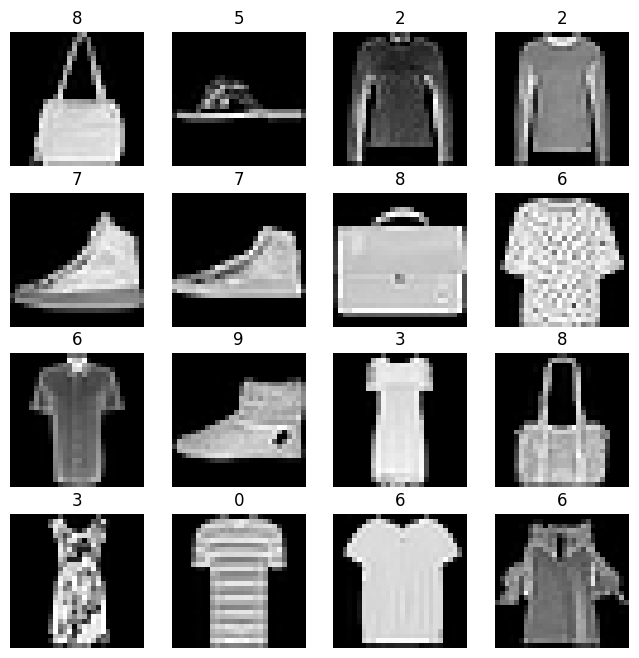

In [5]:
# Visualize some images of the FashionMNIST dataset
# Size of training data
print(train_data.data.shape)

# Size of testing data
print(test_data.data.shape)

labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Question 2

Define a dataloader.

In [6]:
from torch.utils.data import DataLoader

BATCH_SIZE = 4
trainloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
testloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

### Question 3: 

Design your own Convolutional Neural Network.

In [7]:
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, \
    Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout, Flatten
from torch.optim import Adam, SGD

In [4]:
class ConvNet(nn.Module):   
    def __init__(self):
        super(ConvNet, self).__init__()
        self.cnn_layers = Sequential(
            
            #first we fix a kernel
            #stride is how much you move every step
            #adds a padding so that our kernel multiplies patches on the border with more detail
            #4 is the output channel so we have 4 kernels being learned
            
            # Defining a 2D convolution layer with a kernel of size 3; padding 1, and stride 1.
            # to do
            
            # Defining another 2D convolution layer

        )
        # Define one linear layer
        self.linear_layers = Sequential(
            Flatten(),
            # to do 
        )

    # Defining the forward pass    
    def forward(self, x):
        z =  # to do
        return z

SyntaxError: invalid syntax (2986975447.py, line 25)

### Question 4

Train your CNN on the training set of FashionMNIST.

In [6]:
convnet = ConvNet()
print(convnet.parameters)

# Optimizer
epochs = 5
learning_rate = 1e-4
optimizer = Adam(convnet.parameters(), lr=learning_rate)

# Choice of the loss
criterion = CrossEntropyLoss() # nll_loss

losses = []
for t in range(epochs):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        
        # set optimizer to zero grad to remove previous epoch gradients
        optimizer.zero_grad()
        
        # Evaluate the loss
        outputs = # to do
        loss = # to do
        
        # backward propagation
        # to do
        
        # One optimization step
        # to do
        
        losses.append(loss.item())

        
        if not i % 2000:
            print(t, i, loss.item())

SyntaxError: invalid syntax (2422636858.py, line 21)

### Question 5

Inspect the optimization procedure through the loss.

In [7]:
plt.plot(losses)
plt.xlabel("Loss")
plt.ylabel("Iterations")

NameError: name 'plt' is not defined

The loss is very noisy because we picked a very small batch size. When we change it to 32, the loss clearly follows a decreasing fashion.

### Question 6

Quality prediction on the test set.

### Question 7

Train the feed-forward neural network on FashionMnist and compare the accuracy of the CNN and the simple MLP.
Test it for different parameters and comment the performances.

tensor(0.8698)


## Bonus question: Compare the computational time of MLP and CNN (with same hidden size) using the library ‘‘time''